In [1]:
import numpy as np
import pandas as pd

import seaborn as sbn

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("..\\res\\coffee_shop_revenue.csv")
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


array([[<Axes: title={'center': 'Number_of_Customers_Per_Day'}>,
        <Axes: title={'center': 'Average_Order_Value'}>,
        <Axes: title={'center': 'Operating_Hours_Per_Day'}>],
       [<Axes: title={'center': 'Number_of_Employees'}>,
        <Axes: title={'center': 'Marketing_Spend_Per_Day'}>,
        <Axes: title={'center': 'Location_Foot_Traffic'}>],
       [<Axes: title={'center': 'Daily_Revenue'}>, <Axes: >, <Axes: >]],
      dtype=object)

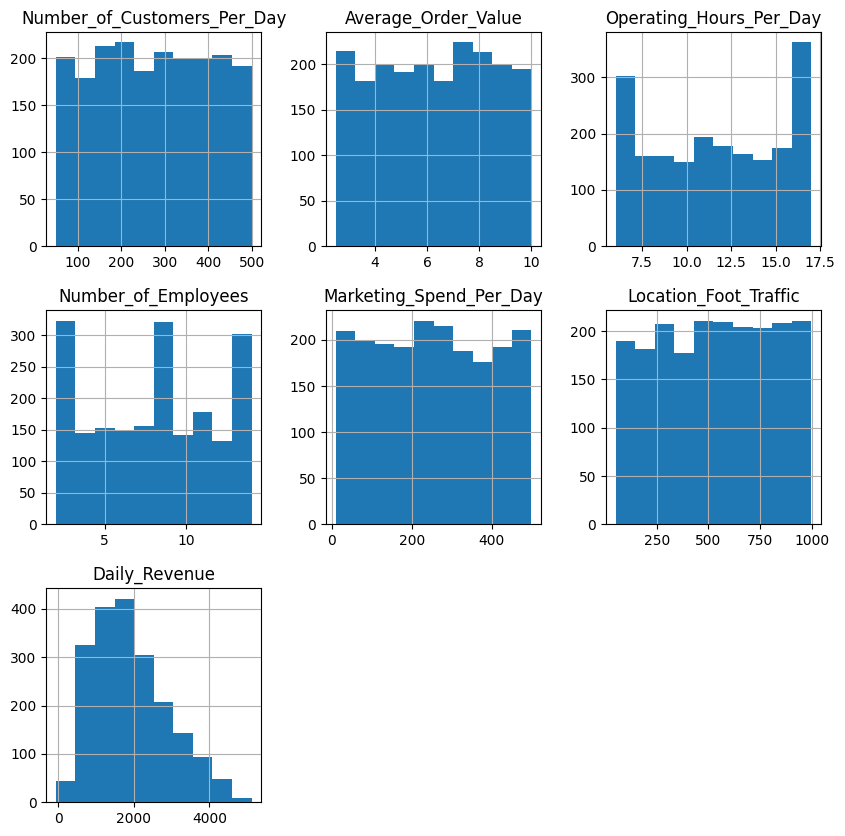

In [4]:
df.hist(df.columns, figsize=(10, 10))

In [5]:
X0 = df[df.columns[:-1]]
y = df["Daily_Revenue"]
X0, y

(      Number_of_Customers_Per_Day  Average_Order_Value  \
 0                             152                 6.74   
 1                             485                 4.50   
 2                             398                 9.09   
 3                             320                 8.48   
 4                             156                 7.44   
 ...                           ...                  ...   
 1995                          372                 6.41   
 1996                          105                 3.01   
 1997                           89                 5.28   
 1998                          403                 9.41   
 1999                           89                 6.88   
 
       Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
 0                          14                    4                   106.62   
 1                          12                    8                    57.83   
 2                           6                    

<Axes: >

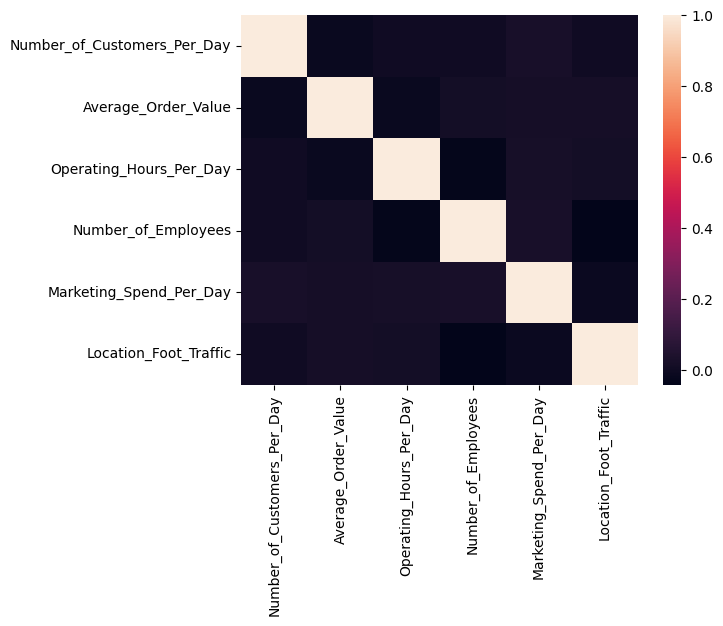

In [6]:
sbn.heatmap(X0.corr())

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=42)
y_train.shape, y_test.shape

((1500,), (500,))

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [9]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

print('Train R^2: ', model.score(X_train,y_train ))
print('Test R^2: ', model.score(X_test, y_test ))

Train MSE:  105284.7767872471
Test MSE:  97369.38567331535
Train MAE:  255.72021858785186
Test MAE:  245.05765992152084
Train R^2:  0.8897836821619403
Test R^2:  0.8968767877413593


<BarContainer object of 6 artists>

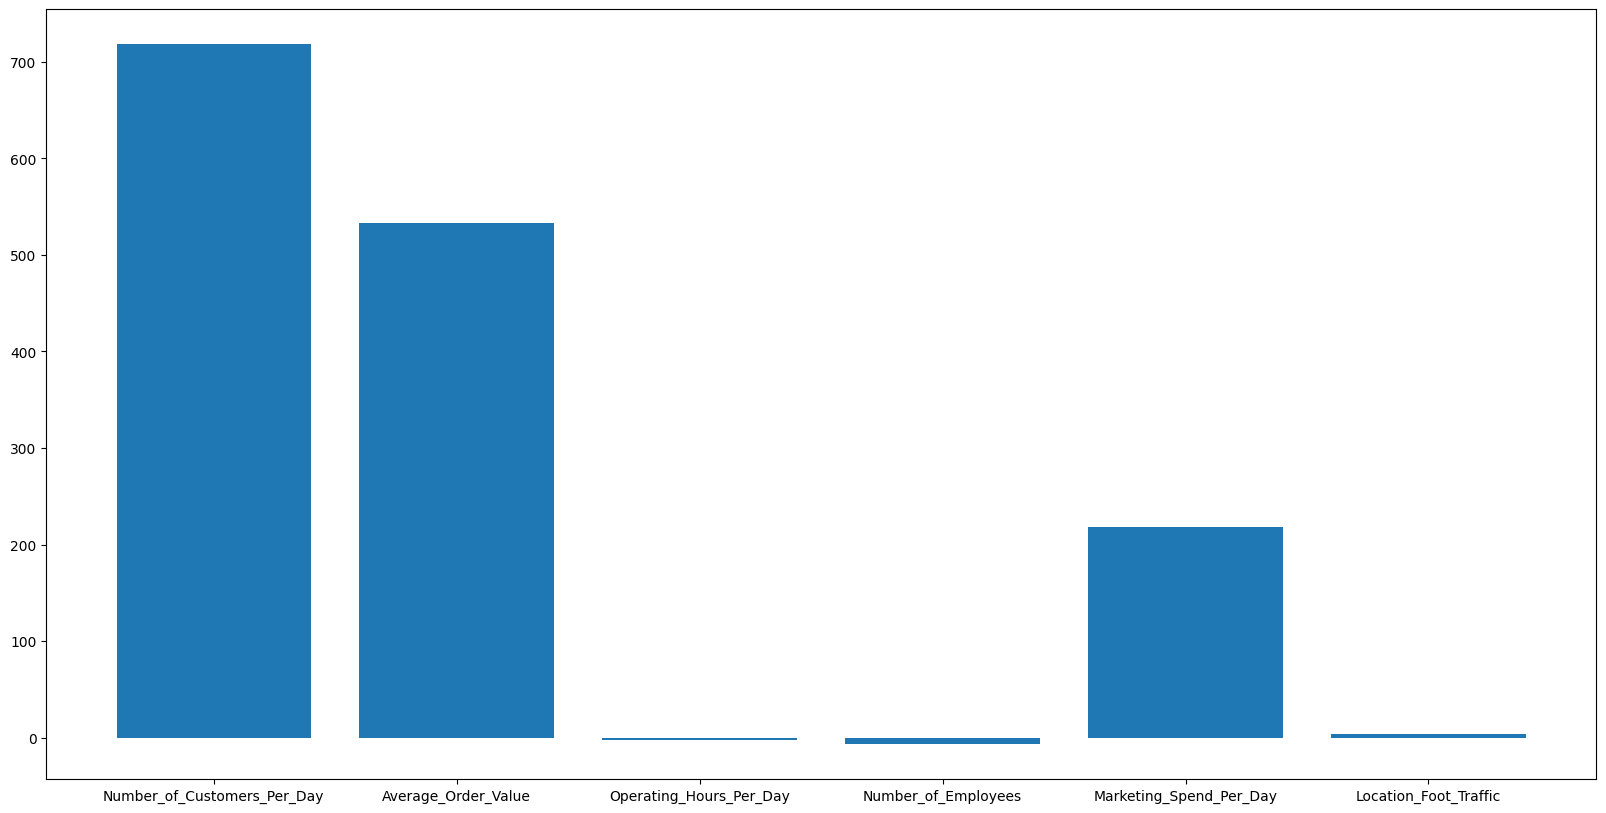

In [10]:
plt.figure(figsize=(20, 10))
plt.bar(X0.columns, model.coef_)

In [11]:
lr = Ridge(alpha=0.1)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8968770077114586

In [12]:
ls = Lasso(alpha=0.01)
ls.fit(X_train, y_train)
ls.score(X_test,y_test)

0.8968765974219459